# Дипломная работа по курсу "Python для анализа данных"  
 Данные: опрос уровня удовлетворенности работой (Employee Satisfaction Index, ESI) сотрудников некой компании

In [1]:
# подключим нужные библиотеки
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

___
## Задание 1
Загрузите файл HR.csv в pandas dataframe

In [2]:
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2] # форматируем ссылку для автоматической загрузки
df_ESI = pd.read_csv(
    url, 
    dtype={'salary':CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)}
)

In [3]:
# результат загрузки
df_ESI.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# убедимся, что данные разного типа и назначения кодированы корректно
df_ESI['department'] = df_ESI.department.astype('category')
df_ESI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   department             14999 non-null  category
 9   salary                 14999 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 967.4 KB


___
## Задание 2
Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). 

In [5]:
# сформируем описательную статистику 
# отдельно для категориальных данных
df_ESI.describe(include=['category'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [6]:
# отдельно выведем частоты для department 
# (номинальная категориальная переменная)
desc_dep = pd.DataFrame(df_ESI.department.value_counts())
desc_dep['percent'] = (
    desc_dep['department'] / 
    desc_dep['department'].sum()
).round(4) * 100
desc_dep

,department,percent
sales,4140,27.60
technical,2720,18.13
support,2229,14.86
IT,1227,8.18
product_mng,902,6.01
marketing,858,5.72
RandD,787,5.25
accounting,767,5.11
hr,739,4.93
management,630,4.20


In [7]:
# отдельно выведем частоты для salary 
# (порядковая категориальная переменная)
desc_sal = pd.DataFrame(df_ESI.salary.value_counts())
desc_sal['percent'] = (
    desc_sal['salary'] / 
    desc_sal['salary'].sum()
).round(4) * 100
desc_sal

,salary,percent
low,7316,48.78
medium,6446,42.98
high,1237,8.25


In [8]:
# выведем стандартную описательную статистику
# для количественных данных (включены по умолчанию)
df_ESI.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


___
## Задание 3
Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.  
Определите две самые скоррелированные и две наименее скоррелированные переменные.  

In [9]:
# аналогично описательной статистике, 
# матрица корреляций по умолчанию описывает 
# только количественные переменные
df_corrmat = df_ESI.corr()
df_corrmat.style.background_gradient(cmap='Blues').format('{:.2f}')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


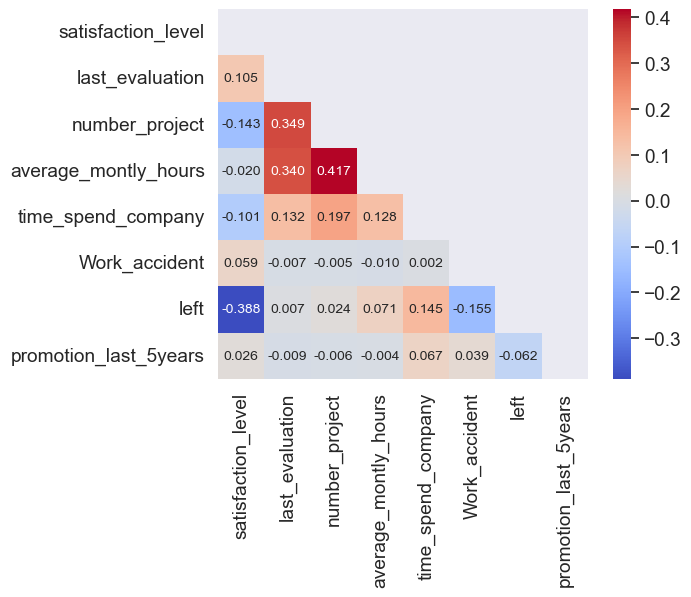

In [10]:
# визуализация корреляционной матрицы
sns.set(font_scale=1.25)
hm = sns.heatmap(
    df_corrmat, 
    cmap='coolwarm',
    cbar=True, 
    annot=True, 
    square=True, 
    mask = np.triu(df_corrmat), # поскольку матрица симметрична относительно главной диагонали
    fmt='.3f', 
    annot_kws={'size': 10}, 
    yticklabels=df_corrmat.index, xticklabels=df_corrmat.index
)
plt.show()

### Выводы: 
1) пара наиболее скоррелированных переменных - _*average_monthly_hours*_ & _*number_project*_  
То есть наблюдается умеренная прямая статистическая связь между количеством выполненных проектов и количеством проведенных на рабочем месте часов, что может свидетельствовать о неблагоприятном явлении: сотрудники вынуждены дополнительно вкладывать личные ресурсы времени ради своевременного завершения этапов проектов. Видно, что оба этих показателя значимо и примерно одинаково повлияли на исследуемый признак по итогам предыдущего опроса, а сейчас их роль невелика.  

2) ни одна пара переменных не показала уровень взаимосвязи выше умеренного  

3) пара наименее скоррелированных переменных - _*work_accident*_ & _*time_spend_company*_ (при том, что последняя взаимосвязана со всеми остальными слабо или умеренно)  
То есть практически отсутствует связь между стажем работы в данной компании и фактами несчастных случаев - скорее всего, это просто обусловлено спецификой деятельности (например, компания не работает в сфере с повышенным риском травматизма и там обеспечены нормальные условия труда)  

4) есть переменная, у которой практически отсутствует (не достигает уровня слабой) связь со всеми прочими - это _*promotion_last_5years*_  
То есть факты повышения сотрудников предположительно не влияют на прочие факторы исследования и не могут быть ими обусловлены (в целом по имеющимся данным). Повышение сотрудников, вероятно, вызвано иными причинами (если не предполагать вообще случайный характер повышения, что было бы неестественно).  

5) correlation does not imply causation  
Как всегда, имеем в виду =)

___
## Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте. 


In [11]:
df_ESI_current = df_ESI[df_ESI['left'] == 0]
df_ESI_current.department.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

___
## Задание 5
Показать распределение сотрудников по зарплатам.


In [12]:
df_ESI_salaries = df_ESI[['department', 'salary']]
df_ESI_salary_dist = df_ESI_salaries.groupby('salary')
df_ESI_salary_dist.count()

,department
salary,
low,7316
medium,6446
high,1237


Text(0.5, 1.0, 'Overall distribution by salary')

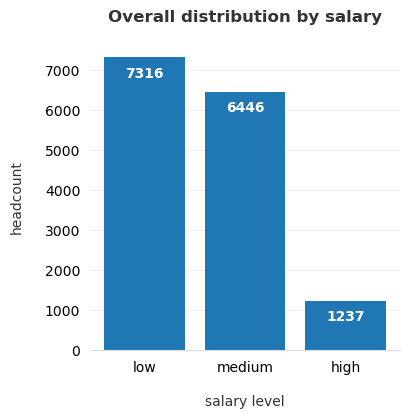

In [13]:
# настроим область построения
plt.rcdefaults()

plt.rcParams['figure.figsize'] = (4, 4)

fig, ax = plt.subplots()

# настроим столбики
bars = ax.bar(
    x=df_ESI_salaries.salary.unique(),
    height=df_ESI_salary_dist.count().department
)

# отформатируем вывод осей
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# добавим метки данных
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() -500,
        bar.get_height(),
        horizontalalignment='center',
        color='#FFFFFF', # или bars[0].get_facecolor()
        weight='bold'
    )

# добавим подписи элементов
ax.set_xlabel('salary level', labelpad=15, color='#333333')
ax.set_ylabel('headcount', labelpad=15, color='#333333')
ax.set_title('Overall distribution by salary', pad=15, color='#333333', weight='bold')


___
## Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности 

In [14]:
# подготовим данные
df_ESI_salaries_dist2 = df_ESI_salaries.groupby(
    ['salary', 'department'])\
    .agg(value = ('salary', 'count'))\
    .reset_index()
df_ESI_salaries_dist2.head() # проверка

,salary,department,value
0,low,IT,609
1,low,RandD,364
2,low,accounting,358
3,low,hr,335
4,low,management,180


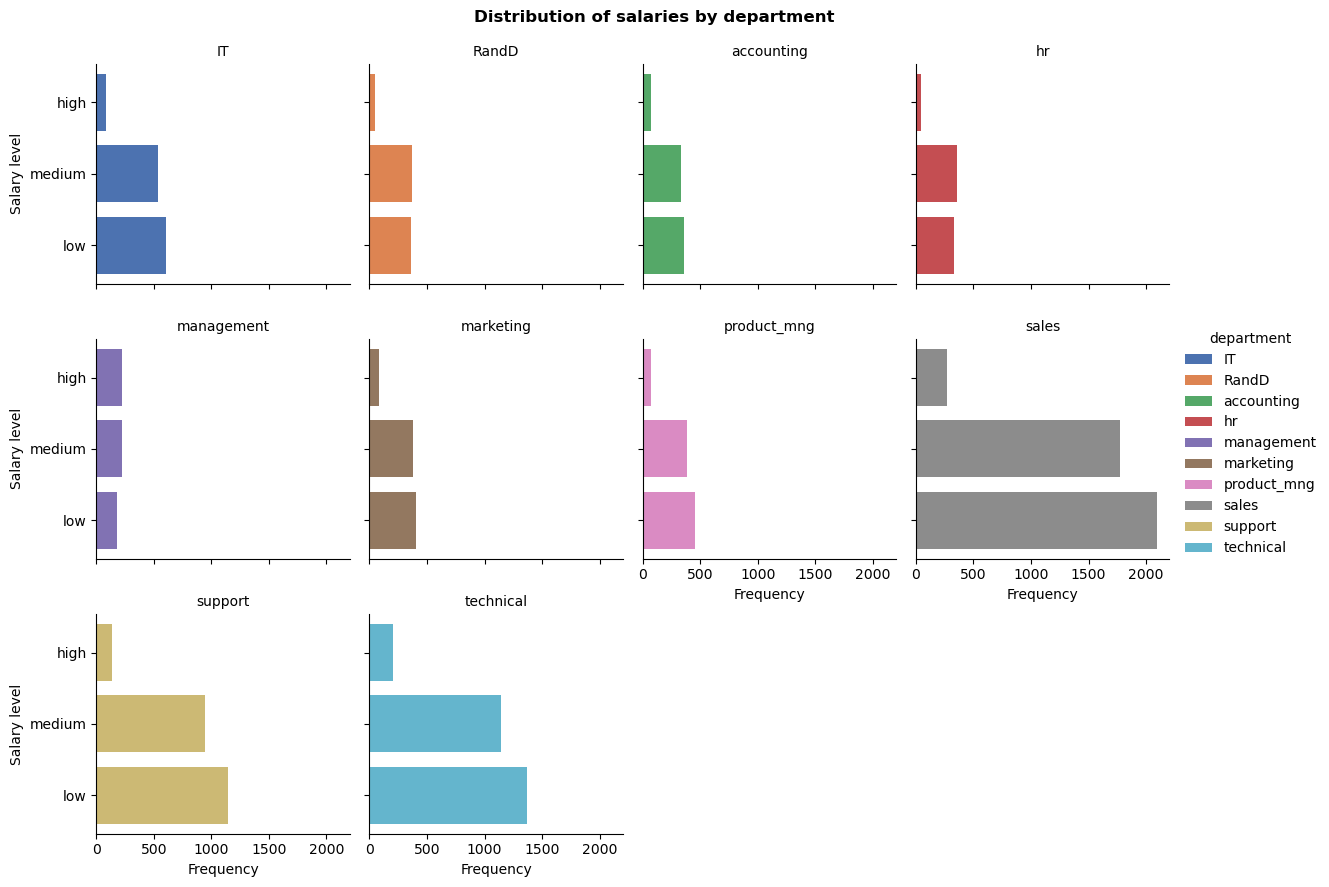

In [15]:
# настраиваем фасеты
g = sns.FacetGrid(
    df_ESI_salaries_dist2, 
    col='department', 
    palette=sns.color_palette("deep"),
    hue='department', 
    col_wrap=4, 
)

# заполняем сетку диаграммами
g = g.map(plt.barh, 'salary', 'value')
g.add_legend()
 
# добавим подписи
g = g.set_axis_labels("Frequency", "Salary level") 

# настраиваем заголовки в фасетах и в целом
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Distribution of salaries by department', weight='bold')

# выводим графики
plt.show()

___
## Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом 

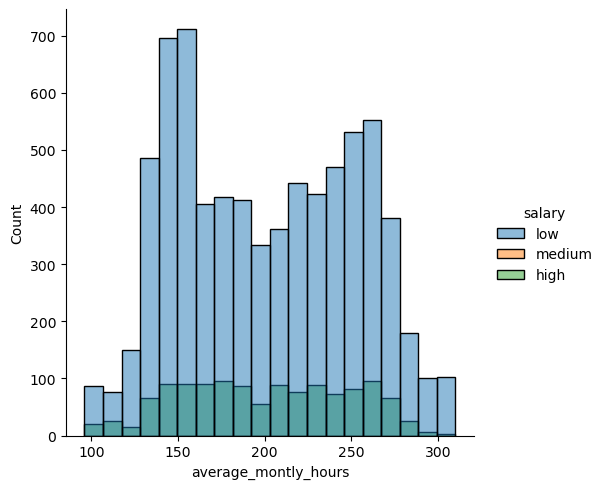

In [16]:
# посмотрим предварительно на обе выборки
df_ESI_HT1 = df_ESI[['salary', 'average_montly_hours']]\
        .query("salary != 'medium'")
sns.displot(
    df_ESI_HT1, 
    x="average_montly_hours", 
    hue="salary", 
    bins=20
)


> **сформулируем гипотезы для теста**  
H₀: среднее выборки сотрудников с высоким окладом ("high") 
    не превосходит среднего выборки с низким окладом ("low")   
H₁: среднее выборки "high" больше среднего выборки "low"


In [17]:
# проверим предпосылку нормальности данных для выбора теста
# используем критерий Колмогорова-Смирнова
data = df_ESI_HT1.query("salary == 'low'")['average_montly_hours']
loc, scale = st.norm.fit(data)
stat_value_low, p_value_low = st.kstest(
    data, 
    st.norm(loc=loc, scale=scale).cdf
)
# print(p_value_low)
print("Kolmogorov–Smirnov p-value (for low salaries):%.4f" % p_value_low)

Kolmogorov–Smirnov p-value (for low salaries):0.0000


In [18]:
data = df_ESI_HT1.query("salary == 'high'")['average_montly_hours']
loc, scale = st.norm.fit(data)
stat_value_high, p_value_high = st.kstest(
    data, 
    st.norm(loc=loc, scale=scale).cdf
)
# print(p_value_high)
print("Kolmogorov–Smirnov p-value (for high salaries):%.4f" % p_value_high)

Kolmogorov–Smirnov p-value (for high salaries):0.0001


Исходные данные в обеих выборках сильно отличаются от нормального распределения, поэтому для их сравнения нельзя использовать параметрический тест. Используем непараметрический эквивалент для несвязанных выборок: критерий Манна-Уитни. 

In [19]:
mwtest, pvalue = st.mannwhitneyu(
    x=df_ESI_HT1.query("salary == 'high'")['average_montly_hours'],
    y=df_ESI_HT1.query("salary == 'low'")['average_montly_hours'],
    alternative="greater"
)
print("p-value:%.4f" % pvalue)

p-value:0.5879


### Вывод: 
> согласно имеющимся данным, нулевая гипотеза **не может быть отвергнута** (вероятно, средние в категориях "salary" не отличаются либо отличаются в другую сторону).   
Это означает, что нет оснований утверждать, будто сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. 

___
## Задание 8
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 
- Доля сотрудников с повышением за последние 5 лет 
- Средняя степень удовлетворенности 
- Среднее количество проектов 

In [20]:
# посчитаем долю к общему итогу кастомной функцией
pct_promoted = lambda x: x.sum() / x.count() if x.count() else None
# определим необходимые агрегации
agg_func = {
    'promotion_last_5years': [('Доля сотрудников с повышением за последние 5 лет', pct_promoted)],
    'satisfaction_level': [('Средняя степень удовлетворенности', 'mean')],
    'number_project': [('Среднее количество проектов', 'mean')]
}
df_ESI_stats = df_ESI.groupby('left').agg(agg_func).round(4)
# отформатируем и выведем результат 
df_ESI_stats.rename(index={0:'Работающие сотрудники', 1:'Уволенные сотрудники'}, inplace=True)
df_ESI_stats.columns = df_ESI_stats.columns.droplevel()
df_ESI_stats.index.names = ['']
df_ESI_stats

,Доля сотрудников с повышением за последние 5 лет,Средняя степень удовлетворенности,Среднее количество проектов
,,,
Работающие сотрудники,0.0263,0.6668,3.7867
Уволенные сотрудники,0.0053,0.4401,3.8555


___
## Задание 9
Разделить данные на тестовую и обучающую выборки  
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)  
Оценить качество модели на тестовой выборки 

In [21]:
# разделяем выборки
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    df_ESI.loc[:, ~df_ESI.columns.isin(['left', 'department', 'salary'])], 
    df_ESI['left'], 
    random_state=42
)
# проверим пропорции
len(X_train), len(X_test), len(Y_train), len(Y_test)

(11249, 3750, 11249, 3750)

In [22]:
# построим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda.predict(X_test) # вектор предсказанных значений

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
# оценим качество модели 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, lda.predict(X_test))

0.7536

### Вывод: 
линейная модель, обученная на имеющихся данных, ошибается приблизительно в 1 случае из 4. 